## File to allocate population
Jameson Carter

purpose: To distribute the entire population into residential buildings according to the average household size in tracts.

input: relevant_buildings.shp
       sourced from '2- Generate spatial dataset.ipynb' and ACSData.csv sourced from '3- getPopulation.py'
       
output: relevant_buildings_populated.shp

#### 1. Import buildings and population data

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from shapely import wkt

In [2]:
buildings = gpd.read_file('C:/Users/jacar/OneDrive/Documents/GitHub/Food-Access/processed_data/relevant_buildings.shp')

In [3]:
population = pd.read_csv('C:/Users/jacar/OneDrive/Documents/GitHub/Food-Access/processing_code/ACSData.csv')

In [4]:
buildings

,CLASS,class_reco,hood,geoid10,tractce10,geometry
0,C,1-Unit Residential,Brookline,420031918003,191800,"POLYGON ((-80.01230 40.38309, -80.01255 40.383..."
1,R,1-Unit Residential,Brookline,420031918003,191800,"POLYGON ((-80.01382 40.38638, -80.01380 40.386..."
2,R,1-Unit Residential,Brookline,420031918003,191800,"POLYGON ((-80.01309 40.38253, -80.01307 40.382..."
3,R,1-Unit Residential,Brookline,420031918003,191800,"POLYGON ((-80.01399 40.38554, -80.01399 40.385..."
4,R,1-Unit Residential,Brookline,420031918003,191800,"POLYGON ((-80.00736 40.38204, -80.00729 40.381..."
...,...,...,...,...,...,...
116273,C,commercial,Point Breeze,420039811001,981100,"POLYGON ((-79.90934 40.44247, -79.90928 40.442..."
116274,R,2-Unit Residential,Squirrel Hill South,420039803001,980300,"POLYGON ((-79.91447 40.43197, -79.91443 40.431..."
116275,C,commercial,Squirrel Hill South,420039803001,980300,"POLYGON ((-79.90925 40.42686, -79.90910 40.426..."
116276,R,1-Unit Residential,Squirrel Hill South,420039803001,980300,"POLYGON ((-79.91190 40.43303, -79.91190 40.433..."


In [5]:
population['geometry'] = population['geometry'].apply(wkt.loads)
geo_population = gpd.GeoDataFrame(population, geometry = 'geometry').set_crs(buildings.crs)

In [6]:
buildings.crs == geo_population.crs

True

<AxesSubplot:>

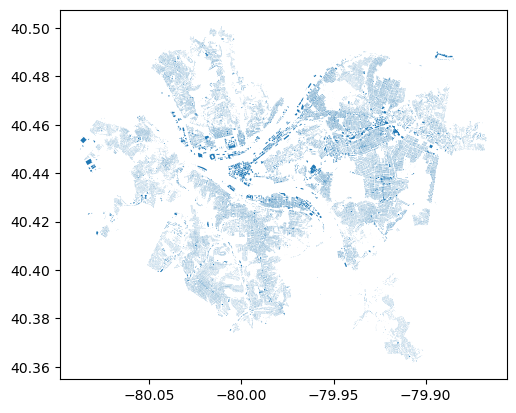

In [7]:
merge = buildings.sjoin(geo_population, how='inner')
merge.plot()

In [1]:
geo_population.plot()

NameError: name 'population' is not defined

In [9]:
merge['class_reco'].unique()

array(['1-Unit Residential', '2-Unit Residential', 'commercial',
       'Grocery Store', '4+ Unit Residential', '3-Unit Residential'],
      dtype=object)

In [28]:
merge['estimated_hh'] = 0 # baseline is nobody lives in a building
# Code according to number of units in a building
merge.loc[merge['class_reco'] == '1-Unit Residential', 'estimated_hh'] = 1
merge.loc[merge['class_reco'] == '2-Unit Residential', 'estimated_hh'] = 2
merge.loc[merge['class_reco'] == '3-Unit Residential', 'estimated_hh'] = 3
merge.loc[merge['class_reco'] == '4+ Unit Residential', 'estimated_hh'] = 4
merge['estimated_hh'] = merge['estimated_hh']*merge['B25010_001E'] # Get total estimate
merge.groupby('tractce10')['estimated_hh'].sum().sort_values(ascending = False)

tractce10
120300    9145.50
140800    8456.56
140300    7580.32
141300    6278.45
141400    6180.41
           ...   
980800       0.00
980900       0.00
981000       0.00
981200       0.00
982200       0.00
Name: estimated_hh, Length: 138, dtype: float64

In [40]:
merge.loc[(merge['tractce10'] == '010300')&(merge['class_reco'] != 'commercial')&(merge['class_reco'] != 'Grocery Store')]


,CLASS,class_reco,hood,geoid10,tractce10,geometry,index_right,Unnamed: 0,geo_id,B01003_001E,B25010_001E,estimated_hh
59986,R,1-Unit Residential,Bluff,420030103002,010300,"POLYGON ((-79.97737 40.43647, -79.97733 40.436...",1,1,1400000US42003010302,4101.0,1.96,1.96
59988,R,1-Unit Residential,Bluff,420030103002,010300,"POLYGON ((-79.98155 40.43710, -79.98167 40.437...",1,1,1400000US42003010302,4101.0,1.96,1.96
59990,R,1-Unit Residential,Bluff,420030103002,010300,"POLYGON ((-79.98004 40.43673, -79.98003 40.436...",1,1,1400000US42003010302,4101.0,1.96,1.96
59991,R,1-Unit Residential,Bluff,420030103002,010300,"POLYGON ((-79.98014 40.43674, -79.98013 40.436...",1,1,1400000US42003010302,4101.0,1.96,1.96
59992,R,1-Unit Residential,Bluff,420030103002,010300,"POLYGON ((-79.98036 40.43649, -79.98029 40.436...",1,1,1400000US42003010302,4101.0,1.96,1.96
...,...,...,...,...,...,...,...,...,...,...,...,...
60194,R,1-Unit Residential,Bluff,420030103002,010300,"POLYGON ((-79.98236 40.43708, -79.98225 40.437...",1,1,1400000US42003010302,4101.0,1.96,1.96
60196,R,1-Unit Residential,Bluff,420030103002,010300,"POLYGON ((-79.98190 40.43705, -79.98185 40.437...",1,1,1400000US42003010302,4101.0,1.96,1.96
60197,R,1-Unit Residential,Bluff,420030103002,010300,"POLYGON ((-79.98221 40.43795, -79.98215 40.437...",1,1,1400000US42003010302,4101.0,1.96,1.96
60198,R,1-Unit Residential,Bluff,420030103002,010300,"POLYGON ((-79.97688 40.43788, -79.97687 40.438...",1,1,1400000US42003010302,4101.0,1.96,1.96


In [37]:
2050/837 # What would the average population be, based on this?

2.4492234169653524

In [44]:
merge.loc[(merge['class_reco'] != 'commercial')&(merge['class_reco'] != 'Grocery Store')].groupby('tractce10')['estimated_hh'].count()
merge.loc[(merge['class_reco'] != 'commercial')&(merge['class_reco'] != 'Grocery Store')].groupby('tractce10')['B01003_001E'].unique()

tractce10
010300                  [4101.0]
020100          [4654.0, 2655.0]
020300          [1368.0, 1256.0]
030500                  [2655.0]
040200          [1414.0, 4673.0]
                   ...          
980400     [2157.0, 0.0, 4252.0]
980500    [4816.0, 23.0, 2541.0]
980700             [2553.0, 0.0]
981100             [3932.0, 0.0]
981800           [2050.0, 434.0]
Name: B01003_001E, Length: 131, dtype: object

In [10]:
# tract_estimates = dict()
'''
for tract in merge['tractce10'].unique():
    tractpop = 0
    totalpop = merge.loc[merge['tractce10'] == tract].head(1)[['B01003_001E']] # first, get the total population
    avghh = merge.loc[merge['tractce10'] == tract].head(1)[['B25010_001E']] # next, get the average HH size
    
    # Now get all of the indicies of the relevant buildings
    buildings_ind = merge[merge['tractce10'] == tract].index

    for building in buildings_ind:
        if merge.iloc[building]['class_reco'] == '1-Unit Residential':
            print('1-unit')
            estimated_hh = avghh
        if merge.iloc[building]['class_reco'] == '2-Unit Residential':
            estimated_hh = 2*avghh
            print('2 unit')
        if merge.iloc[building]['class_reco'] == '3-Unit Residential':
            estimated_hh = 3*avghh
            print('3 unit')
        if merge.iloc[building]['class_reco'] == '4+ Unit Residential':
            estimated_hh = 4*avghh
            print('4 unit')
        tractpop += estimated_hh 
    
    # Estimates dictionary
    tract_estimates[tract] = [tractpop.values,totalpop.values]
'''


1-unit
1-unit
1-unit
1-unit
1-unit
2 unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
2 unit
1-unit
1-unit
2 unit
1-unit
2 unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
2 unit
1-unit
1-unit
1-unit
1-unit
2 unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
1-unit
2 unit
1-unit
1-unit

KeyboardInterrupt: 

In [22]:

pd.DataFrame.from_dict(tract_estimates).T

,0,1
191800,[[6978.960000000213]],[[2103.0]]
320700,[[2611.4399999999855]],[[5032.0]]
191900,[[2591.999999999998]],[[5032.0]]
320600,[[2529.3600000000015]],[[5032.0]]
191700,[[6210.0]],[[2317.0]]
...,...,...
080600,[[nan]],[[2263.0]]
140200,[[2444.6700000000055]],[[2500.0]]
070600,[[709.6400000000046]],[[2115.0]]
080400,[[nan]],[[1578.0]]


In [20]:
tract_estimates['191800'][0]

array([6978.96])

In [23]:
merge.loc[merge['tractce10'] == '080400']

,CLASS,class_reco,hood,geoid10,tractce10,geometry,index_right,Unnamed: 0,geo_id,B01003_001E,B25010_001E
114892,C,commercial,Bloomfield,420030804002,080400,"POLYGON ((-79.94641 40.45979, -79.94652 40.459...",23,23,1400000US42003080400,1578.0,1.72
114893,R,2-Unit Residential,Bloomfield,420030804002,080400,"POLYGON ((-79.94270 40.45741, -79.94251 40.457...",23,23,1400000US42003080400,1578.0,1.72
114894,R,2-Unit Residential,Bloomfield,420030804002,080400,"POLYGON ((-79.94610 40.45565, -79.94620 40.455...",23,23,1400000US42003080400,1578.0,1.72
114895,R,2-Unit Residential,Bloomfield,420030804002,080400,"POLYGON ((-79.94282 40.45702, -79.94285 40.456...",23,23,1400000US42003080400,1578.0,1.72
114896,R,commercial,Bloomfield,420030804002,080400,"POLYGON ((-79.94199 40.45652, -79.94193 40.456...",23,23,1400000US42003080400,1578.0,1.72
...,...,...,...,...,...,...,...,...,...,...,...
115403,C,2-Unit Residential,Bloomfield,420030804002,080400,"POLYGON ((-79.94819 40.45597, -79.94774 40.455...",23,23,1400000US42003080400,1578.0,1.72
115404,C,commercial,Bloomfield,420030804002,080400,"POLYGON ((-79.94846 40.45368, -79.94789 40.453...",23,23,1400000US42003080400,1578.0,1.72
115405,C,commercial,Bloomfield,420030804002,080400,"POLYGON ((-79.94846 40.45368, -79.94789 40.453...",23,23,1400000US42003080400,1578.0,1.72
115406,C,commercial,Bloomfield,420030804002,080400,"POLYGON ((-79.95015 40.45525, -79.94926 40.455...",23,23,1400000US42003080400,1578.0,1.72


In [ ]:
merge.iloc[merge[merge['tractce10'] == '191800'].index]

,CLASS,class_reco,hood,geoid10,tractce10,geometry,index_right,Unnamed: 0,geo_id,B01003_001E,B25010_001E
0,C,1-Unit Residential,Brookline,420031918003,191800,"POLYGON ((-80.01230 40.38309, -80.01255 40.383...",248,248,1400000US42003479000,2103.0,2.43
1,R,1-Unit Residential,Brookline,420031918003,191800,"POLYGON ((-80.01382 40.38638, -80.01380 40.386...",248,248,1400000US42003479000,2103.0,2.43
2,R,1-Unit Residential,Brookline,420031918003,191800,"POLYGON ((-80.01309 40.38253, -80.01307 40.382...",248,248,1400000US42003479000,2103.0,2.43
3,R,1-Unit Residential,Brookline,420031918003,191800,"POLYGON ((-80.01399 40.38554, -80.01399 40.385...",248,248,1400000US42003479000,2103.0,2.43
4,R,1-Unit Residential,Brookline,420031918003,191800,"POLYGON ((-80.00736 40.38204, -80.00729 40.381...",248,248,1400000US42003479000,2103.0,2.43
...,...,...,...,...,...,...,...,...,...,...,...
211,R,1-Unit Residential,Brookline,420031918003,191800,"POLYGON ((-80.02032 40.38873, -80.02028 40.388...",71,71,1400000US42003191800,5032.0,2.16
2139,R,1-Unit Residential,Brookline,420031918003,191800,"POLYGON ((-80.02940 40.39373, -80.02933 40.393...",71,71,1400000US42003191800,5032.0,2.16
2343,R,1-Unit Residential,Brookline,420031918003,191800,"POLYGON ((-80.02218 40.38874, -80.02221 40.388...",71,71,1400000US42003191800,5032.0,2.16
1232,R,1-Unit Residential,Brookline,420031918003,191800,"POLYGON ((-80.01003 40.38917, -80.01000 40.389...",71,71,1400000US42003191800,5032.0,2.16


In [ ]:
merge['class_recode']

NameError: name 'merge' is not defined